# Queue

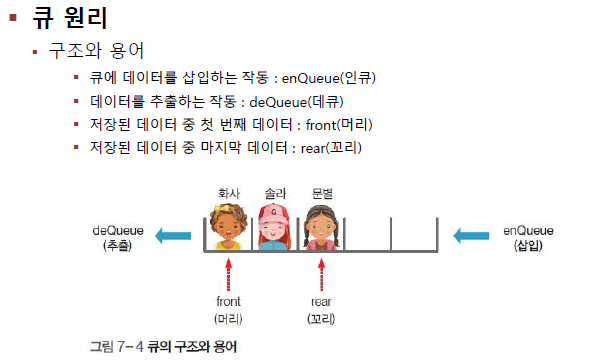
* Stack과 Queue를 구현할 때 컴퓨터가 인식하는 것은 모두 리스트로서 같지만, 단지 다르게 다룰뿐이다.

In [1]:
SIZE = 5
queue = [None for _ in range(SIZE)]
front, rear = -1, -1

In [2]:
# 데이터 입력: enQueue - rear로 조절
rear += 1
queue[rear] = '화사'
rear += 1
queue[rear] = '솔라'
rear += 1
queue[rear] = '문별'
print('출구 <---', queue, '<--- 입구')

출구 <--- ['화사', '솔라', '문별', None, None] <--- 입구


In [3]:
# 데이터 추출: deQueue - front로 조절
front += 1
data = queue[front]
queue[front] = None
print('추출한 데이터:', data)
print('출구 <---', queue, '<--- 입구')

추출한 데이터: 화사
출구 <--- [None, '솔라', '문별', None, None] <--- 입구


## General Code for Queue

In [4]:
# 함수 선언 부분
# Queue가 꽉 찼는지 확인하는 함수
# def isQueueFull():
#     global SIZE, queue, front, rear
#     if rear >= SIZE - 1:
#         return True
#     else:
#         return False

# deQueue 후 앞이 비어있는 Queue인 경우를 반양해서 isQueueFull 다시 작성
def isQueueFull():
    global SIZE, queue, front, rear
    if rear != SIZE - 1:
        return False
    if (rear == SIZE - 1) and (front == -1):
        return True         # 처음부터 끝까지 다 찬 상태
    else:   # (rear == SIZE -1) and (front != -1)인 경우
        for i in range(front+1, SIZE):   # 데이터가 front+1~끝까지 차있는 상태
            queue[i-1] = queue[i]
            queue[i] = None
        front -= 1      # 한칸씩만 앞으로 당기고 뒤에 입력할 수 있는 자리 마련
        rear -= 1
        return False



# Queue에 입력하는 함수   
def enQueue(data):
    global SIZE, queue, front, rear
    if isQueueFull():
        print('Queue is FULL-----------------------')
        return
    rear += 1
    queue[rear] = data
    
# Queue가 비었는지 확인하는 함수
def isQueueEmpty():
    global SIZE, queue, front, rear
    if front == rear:
        return True
    else:
        False
        
# Queue에서 빼내는 함수
def deQueue():
    global SIZE, queue, front, rear
    if isQueueEmpty():
        print('Queue is EMPTY----------------------')
        return None
    front += 1
    data = queue[front]
    queue[front] = None
    return data
       
# 데이터 확인하는 함수
def pick():
    global SIZE, queue, front, rear
    if isQueueEmpty():
        print('Queue is EMPTY----------------------')
        return None
    return queue[front + 1]



# 변수 지정 부분
SIZE = 5
queue = [None for _ in range(SIZE)]
front, rear = -1, -1


# 메인 코드 부분
# enQueue 함수 작동 확인----------------------------------
# queue = ['화사', '솔라', '문별', '휘인', None]
# front, rear = -1, 3
# print(queue)
# enQueue('선미')
# print(queue)
# enQueue('재남')
# print(queue)

# deQueue 함수 작동 확인----------------------------------
# queue = ['화사', None, None, None, None]
# front, rear = -1, 0
# print(queue)
# retData = deQueue()
# print('빼낸 데이터:', retData)
# print(queue)
# deQueue()

# pick 함수 작동 확인-------------------------------------
# queue = ['화사', '솔라', None, None, None]
# front, rear = -1, 1
# print(queue)
# retData = pick()
# print('데이터 확인:', retData)
# print(queue)

데이터가 많아지면, isQueueFull() 동작에서 for loop을 돌리기 위해 많은 overhead가 발생함 →  해결책: `Circular Queue` 

## General Code for Queue

In [5]:
# 프로그램 완성
while True:
    select = input('I: 삽입, E: 추출, C: 확인, Q: 종료')
    
    if select == 'I':
        data = input('Input data---------------------------')
        enQueue(data)
        print('Current queue:', queue)
    
    elif select == 'E':
        retData = deQueue()
        print('Extracted data:', retData)
        print('Current queue:', queue)
        
    elif select == 'C':
        retData = pick()
        print('Confirmed data:', retData)
        print('Current queue', queue)
        
    elif select == 'Q':
        break
    
    else:
        print('올바른 숫자를 입력하세요.')
        
print('프로그램 종료-------------------------------------')

I: 삽입, E: 추출, C: 확인, Q: 종료Q
프로그램 종료-------------------------------------


---

# Circular Queue

Queue는 앞이 비어 있더라도 뒤에서부터 입력해야 하므로 앞으로 이동해야 하는 overhead가 발생. 그러나 Circular Queue의 경우는 순환 구조라 그 다음 빈 자리를 채울 수 있음.<br>
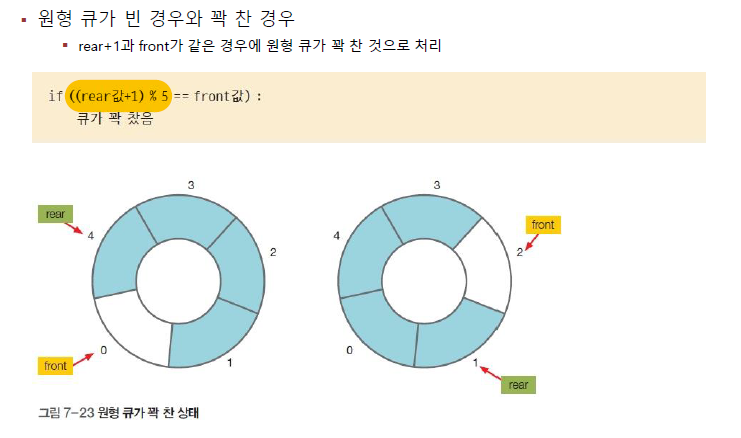
* 원형 큐의 front=0 자리는 항상 비어 있음
* (rear값 + 1) % SIZE: 원형 큐에서 옆칸으로 이동하는 code

## General Code for Circular Queue

In [6]:
# 함수 선언 부분
# Queue가 꽉 찼는지 확인하는 함수
def isQueueFull():
    global SIZE, queue, front, rear
    if (rear+1) % SIZE == front:    #바뀐 부분
        return True
    else:
        return False

# Queue에 입력하는 함수   
def enQueue(data):
    global SIZE, queue, front, rear
    if isQueueFull():
        print('Queue is FULL-----------------------')
        return
    rear  = (rear+1) % SIZE        # 바뀐 부분
    queue[rear] = data
    
# Queue가 비었는지 확인하는 함수
def isQueueEmpty():
    global SIZE, queue, front, rear
    if front == rear:
        return True
    else:
        False
        
# Queue에서 빼내는 함수
def deQueue():
    global SIZE, queue, front, rear
    if isQueueEmpty():
        print('Queue is EMPTY----------------------')
        return None
    front = (front+1) % SIZE      # 바뀐 부분
    data = queue[front]
    queue[front] = None
    return data
       
# 데이터 확인하는 함수
def pick():
    global SIZE, queue, front, rear
    if isQueueEmpty():
        print('Queue is EMPTY----------------------')
        return None
    return queue[(front+1) % SIZE]        # 바뀐 부분



# 변수 지정 부분
SIZE = 5
queue = [None for _ in range(SIZE)]
front, rear = 0, 0

In [8]:
# 프로그램 완성
while True:
    select = input('I: 삽입, E: 추출, C: 확인, Q: 종료')
    
    if select == 'I':
        data = input('Input data---------------------------')
        enQueue(data)
        print('Current queue:', queue)
        print('Front:', front, 'Rear:', rear)
    
    elif select == 'E':
        retData = deQueue()
        print('Extracted data:', retData)
        print('Current queue:', queue)
        print('Front:', front, 'Rear:', rear)
        
    elif select == 'C':
        retData = pick()
        print('Confirmed data:', retData)
        print('Current queue', queue)
        print('Front:', front, 'Rear:', rear)
        
    elif select == 'Q':
        break
    
    else:
        print('올바른 숫자를 입력하세요.')
        
print('프로그램 종료-------------------------------------')

I: 삽입, E: 추출, C: 확인, Q: 종료I
Input data---------------------------휘인
Current queue: [None, '휘인', None, None, None]
Front: 0 Rear: 1
I: 삽입, E: 추출, C: 확인, Q: 종료I
Input data---------------------------솔라
Current queue: [None, '휘인', '솔라', None, None]
Front: 0 Rear: 2
I: 삽입, E: 추출, C: 확인, Q: 종료I
Input data---------------------------화사
Current queue: [None, '휘인', '솔라', '화사', None]
Front: 0 Rear: 3
I: 삽입, E: 추출, C: 확인, Q: 종료E
Extracted data: 휘인
Current queue: [None, None, '솔라', '화사', None]
Front: 1 Rear: 3
I: 삽입, E: 추출, C: 확인, Q: 종료E
Extracted data: 솔라
Current queue: [None, None, None, '화사', None]
Front: 2 Rear: 3
I: 삽입, E: 추출, C: 확인, Q: 종료C
Confirmed data: 화사
Current queue [None, None, None, '화사', None]
Front: 2 Rear: 3
I: 삽입, E: 추출, C: 확인, Q: 종료Q
프로그램 종료-------------------------------------
